#Сравнение классификационных моделей для предсказания сердечно-сосудистых заболеваний
Проведем анализ и сравнение нескольких классификационных моделей для задачи предсказания вероятности наличия сердечно-сосудистых заболеваний на основе набора данных. Рассмотрим подробное описание каждой части кода и шагов анализа.

## Содержание
1. **Импорт библиотек**
2. **Загрузка и подготовка данных**
3. **Функция для вычисления метрик**
4. **Функция для обучения и оценки модели**
5. **Обучение и оценка различных моделей**
6. **Визуализация результатов**
7. **ROC-кривая для лучшей модели (Random Forest)**
8. **Вывод итоговых метрик** 9. **Заключение**

### 1. Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

Для работы с данными и построения моделей используются следующие библиотеки:
- **pandas** — для обработки данных в виде таблиц (DataFrame),
- **numpy** — для работы с массивами,
- **matplotlib** и **seaborn** — для визуализации данных,
- **sklearn** — для реализации алгоритмов машинного обучения, включая разделение данных, обучение моделей и вычисление метрик.

### 2. Загрузка и подготовка данных

In [2]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('heart.csv')

Saving heart.csv to heart.csv


Данные загружаются из файла `heart.csv`, который содержит информацию о пациентах и их сердечно-сосудистых заболеваниях. В наборе данных могут быть такие признаки, как возраст, пол, уровень холестерина и другие.

Данные взяты с сайта kaggle: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [3]:
X = data.drop('target', axis=1)
y = data['target']

Здесь происходит разделение данных на признаки (X) и целевую переменную (y). Целевая переменная `target` указывает на наличие или отсутствие заболевания (1 — заболевание есть, 0 — нет).

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777)

Данные делятся на обучающую и тестовую выборки: 70% данных используется для обучения модели, а 30% — для тестирования.

### 3. Функция для вычисления метрик

In [5]:
def calculate_metrics(y_true, y_pred):
    """
    Вычисляет основные метрики качества модели.

    Параметры:
    y_true (array-like): Истинные метки классов
    y_pred (array-like): Предсказанные метки

    Возвращает:
    dict: Метрики (accuracy, precision, recall, f1-score)
    """
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-score': f1_score(y_true, y_pred)
    }

Функция вычисляет основные метрики качества классификационной модели: точность (accuracy), точность предсказания (precision), полноту (recall) и F1-меру. Эти метрики важны для оценки работы модели.

### 4. Функция для обучения и оценки модели

In [6]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Обучает модель, делает предсказания и вычисляет метрики.

    Параметры:
    model: Классификатор (обучаемый)
    X_train, y_train: Обучающая выборка
    X_test, y_test: Тестовая выборка

    Возвращает:
    dict: Метрики качества модели
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return calculate_metrics(y_test, y_pred)

Эта функция обучает классификатор, делает предсказания на тестовых данных и вычисляет метрики качества, используя ранее описанную функцию `calculate_metrics`.

### 5. Обучение и оценка различных моделей

In [7]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=3),
    "Bagging Classifier": BaggingClassifier(DecisionTreeClassifier(), n_estimators=150, random_state=3),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, max_features='sqrt', random_state=37)
}

Три классификационные модели:
- **Decision Tree** — дерево решений,
- **Bagging Classifier** — ансамблевый метод, использующий несколько деревьев решений,
- **Random Forest** — случайный лес, состоящий из множества деревьев решений.

In [8]:
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_train, y_train, X_test, y_test)

Модели обучаются и оцениваются с использованием тестовой выборки. Результаты сохраняются в словарь `results`.

### 6. Визуализация результатов

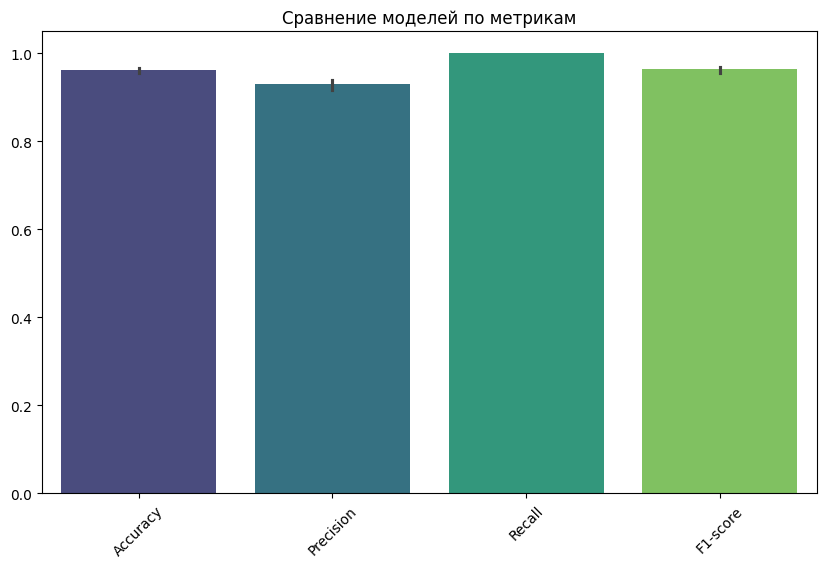

In [9]:
results_df = pd.DataFrame(results).T
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, palette='viridis')
plt.title('Сравнение моделей по метрикам')
plt.xticks(rotation=45)
plt.show()

Для наглядной визуализации результатов работы моделей строится столбчатая диаграмма, которая отображает метрики качества для каждой модели. Используется библиотека `seaborn` для улучшенной визуализации.

### 7. ROC-кривая для лучшей модели (Random Forest)


In [10]:
rf_model = models["Random Forest"]
y_probs = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

Для модели случайного леса строится **ROC-кривая** — график, отображающий зависимость между истинными положительными срабатываниями и ложными положительными. Рассчитывается также показатель **ROC AUC**, который измеряет качество классификации.

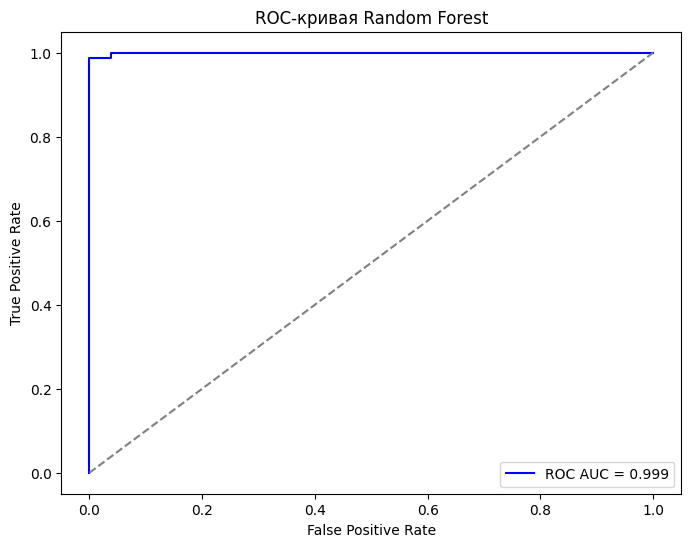

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая Random Forest')
plt.legend()
plt.show()

Строится ROC-кривая для модели случайного леса с отображением значения ROC AUC на графике.

### 8. Вывод итоговых метрик



In [12]:
print(results_df)

                    Accuracy  Precision  Recall  F1-score
Decision Tree       0.954545   0.916168     1.0  0.956250
Bagging Classifier  0.967532   0.938650     1.0  0.968354
Random Forest       0.967532   0.938650     1.0  0.968354


После выполнения всех шагов выводятся итоговые метрики для каждой модели, чтобы можно было оценить, какая модель наиболее эффективна на тестовых данных.


### 9. Заключение
В этом ноутбуке были рассмотрены три классификационные модели для задачи предсказания сердечно-сосудистых заболеваний. Каждая модель была обучена и оценена с использованием метрик качества, таких как точность, точность предсказания, полнота и F1-меры. Визуализированы результаты сравнения моделей и построена ROC-кривая для лучшей модели, которая продемонстрировала наибольшую эффективность.